In [28]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
!unzip drive/MyDrive/2022-2023/Spring23/ML/PROJECT/Segmented.zip> /dev/null

Mounted at /content/drive/


In [4]:
path_t = '/content/drive/MyDrive/2022-2023/Spring23/ML/PROJECT'
path = '/content/Segmented'
blackgrass = len(os.listdir(f'{path}/Black-grass/'))
charlock = len(os.listdir(f'{path}/Charlock/'))
cleavers = len(os.listdir(f'{path}/Cleavers/'))
chickweed = len(os.listdir(f'{path}/Common Chickweed/'))
wheat = len(os.listdir(f'{path}/Common wheat/'))
fat_hen = len(os.listdir(f'{path}/Fat Hen/'))
loose_silkybent = len(os.listdir(f'{path}/Loose Silky-bent/'))
maize = len(os.listdir(f'{path}/Maize/'))
mayweed = len(os.listdir(f'{path}/Scentless Mayweed/'))
purse = len(os.listdir(f'{path}/Shepherds Purse/'))
cranesbill = len(os.listdir(f'{path}/Small-flowered Cranesbill/'))
sugar_beet = len(os.listdir(f'{path}/Sugar beet/'))

In [5]:
np.set_printoptions(threshold=np.inf)
def add_to_array(path, target_value, image_amount):
    arr_x = []
    arr_y = []
    for i in range(1, image_amount):
        try:
          image = Image.open(path + f'{i}.png').resize((36,36))
          img_arr = np.asarray(image).flatten()
          arr_x.append(img_arr.T)
          arr_y.append(target_value)
        except Exception:
          pass
    return (arr_x, arr_y)

species = ['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat'
          ,'Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed'
          ,'Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
data = {
        0: add_to_array(f'{path}/Black-grass/', 0, blackgrass),
        1: add_to_array(f'{path}/Charlock/', 1, charlock ),
        2: add_to_array( f'{path}/Cleavers/', 2, cleavers ),
        3: add_to_array(f'{path}/Common Chickweed/', 3, chickweed ),
        4: add_to_array(f'{path}/Common wheat/', 4, wheat ),
        5: add_to_array( f'{path}/Fat Hen/', 5, fat_hen ),
        6: add_to_array(f'{path}/Loose Silky-bent/', 6, loose_silkybent ),
        7: add_to_array( f'{path}/Maize/', 7, maize ),
        8: add_to_array(f'{path}/Scentless Mayweed/', 8, mayweed ),
        9: add_to_array(f'{path}/Shepherds Purse/', 9, purse ),
        10: add_to_array(f'{path}/Small-flowered Cranesbill/', 10, cranesbill ),
        11: add_to_array(f'{path}/Sugar beet/', 11, sugar_beet )
        }


In [6]:
X = np.array(data[0][0])
y = np.array(data[0][1])
for i in range(1, 12):
    X = np.vstack((X, np.array(data[i][0])))
    y = np.append(y, data[i][1])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
unscaled_X_train = X_train
unscaled_X_test = X_test
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
y_test = y_test.reshape(y_test.shape[0],1)


In [20]:
c = [0.0000001,0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000,1000000]
test_accuracy_lin = []
train_accuracy_lin = []
for i in range(0,9):
  linear_model = SVC(C = c[i], kernel="linear")
  linear_model.fit(X_train,y_train)
  y_pred_linear_test = linear_model.predict(X_test)
  y_pred_linear_train = linear_model.predict(X_train)
  linear_acc_test = np.mean(y_pred_linear_test == y_test)
  linear_acc_train = np.mean(y_pred_linear_train == y_train)
  test_accuracy_lin.append(linear_acc_test)
  train_accuracy_lin.append(linear_acc_train)
print("Testing Error: ", test_accuracy_lin)
print("Training Error: ", train_accuracy_lin)

Testing Error:  [0.13451327433628318, 0.4495575221238938, 0.7008849557522124, 0.7, 0.7044247787610619, 0.7044247787610619, 0.7044247787610619, 0.7044247787610619, 0.7044247787610619]
Training Error:  [0.1474756421612046, 0.48029229406554474, 0.8810894596988486, 0.9951284322409212, 1.0, 1.0, 1.0, 1.0, 1.0]


In [22]:
test_accuracy_rbf = []
train_accuracy_rbf = []
for i in range(0,10):
  rbf_model = SVC(C = c[i], kernel="rbf")
  rbf_model.fit(X_train, y_train)
  y_pred_rbf_test = rbf_model.predict(X_test)
  y_pred_rbf_train = rbf_model.predict(X_train)
  rbf_acc_test = np.mean(y_pred_rbf_test == y_test)
  rbf_acc_train = np.mean(y_pred_rbf_train == y_train)
  test_accuracy_rbf.append(rbf_acc_test)
  train_accuracy_rbf.append(rbf_acc_train)

print("Testing Error: ", test_accuracy_rbf)
print("Training Error: ", train_accuracy_rbf )

Testing Error:  [0.13451327433628318, 0.13451327433628318, 0.13451327433628318, 0.23805309734513275, 0.49911504424778763, 0.7539823008849558, 0.8097345132743363, 0.8150442477876106, 0.8150442477876106, 0.8150442477876106]
Training Error:  [0.1474756421612046, 0.1474756421612046, 0.1474756421612046, 0.2533215234720992, 0.5465013286093888, 0.9074402125775022, 0.9964570416297609, 1.0, 1.0, 1.0]


In [24]:
test_accuracy_poly = []
train_accuracy_poly = []
for i in range(0,10):
  poly_model = SVC(C = c[i], kernel="poly")
  poly_model.fit(X_train, y_train)
  y_pred_poly_test = poly_model.predict(X_test)
  y_pred_poly_train = poly_model.predict(X_train)
  poly_acc_test = np.mean(y_pred_poly_test == y_test)
  poly_acc_train = np.mean(y_pred_poly_train == y_train)
  test_accuracy_poly.append(poly_acc_test)
  train_accuracy_poly.append(poly_acc_train)

print("Testing Error: ", test_accuracy_poly)
print("Training Error: ", train_accuracy_poly)

Testing Error:  [0.13451327433628318, 0.13451327433628318, 0.13451327433628318, 0.16460176991150444, 0.42743362831858406, 0.6814159292035398, 0.7513274336283186, 0.7557522123893805, 0.7557522123893805, 0.7557522123893805]
Training Error:  [0.1474756421612046, 0.1474756421612046, 0.1474756421612046, 0.18135518157661648, 0.5053144375553588, 0.8923826395039858, 0.9849424269264836, 1.0, 1.0, 1.0]


## Error Curves for SVM Kernel: Linear



In [ ]:
linear_model = SVC(C = 0.1, kernel="linear")
linear_model.fit(X_train,y_train)
y_pred_linear_test = linear_model.predict(X_test)
cm_lin = confusion_matrix(y_test,y_pred_linear_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lin, display_labels=[0,1,2,3,4,5,6,7,8,9,10,11])
disp.plot()
plt.show()

## Error Curves for SVM Kernel: RBF


In [ ]:
rbf_model = SVC(C = 10000, kernel="rbf")
rbf_model.fit(X_train,y_train)
y_pred_rbf_test = rbf_model.predict(X_test)
cm_rbf = confusion_matrix(y_test,y_pred_rbf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=[0,1,2,3,4,5,6,7,8,9,10,11])
disp.plot()
plt.show()

## Error Curves for SVM Kernel: Polynomial(Degree 3)

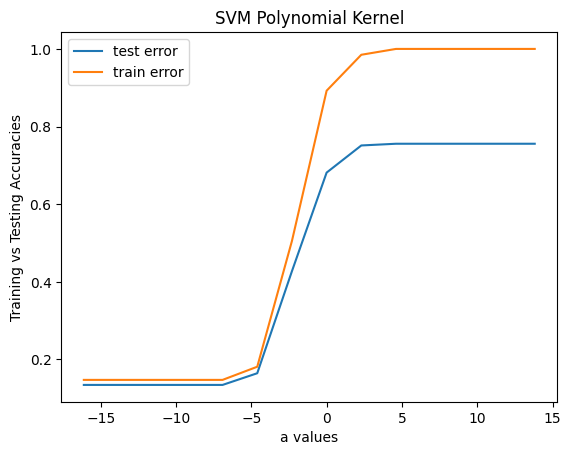

In [31]:
plt.xlabel('a values')
plt.ylabel('Training vs Testing Accuracies')
plt.plot(np.log(c),test_accuracy_poly, label = "test error")
plt.plot(np.log(c),train_accuracy_poly,label = "train error")
plt.title('SVM Polynomial Kernel')
plt.legend()
plt.show()

## Confusion Matrix of SVM's


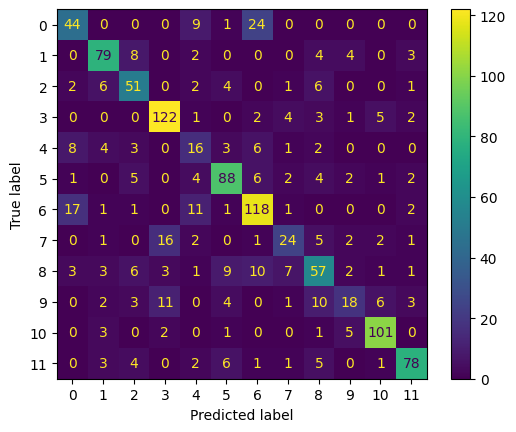

In [29]:
linear_model = SVC(C = 0.1, kernel="linear")
linear_model.fit(X_train,y_train)
y_pred_linear_test = linear_model.predict(X_test)
cm_lin = confusion_matrix(y_test,y_pred_linear_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lin, display_labels=[0,1,2,3,4,5,6,7,8,9,10,11])
disp.plot()
plt.show()


In [ ]:
rbf_model = SVC(C = 10000, kernel="rbf")
rbf_model.fit(X_train,y_train)
y_pred_rbf_test = rbf_model.predict(X_test)
cm_rbf = confusion_matrix(y_test,y_pred_rbf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=[0,1,2,3,4,5,6,7,8,9,10,11])
disp.plot()
plt.show()

In [ ]:
poly_model = SVC(C = 100, kernel="poly")
poly_model.fit(X_train,y_train)
y_pred_poly_test = poly_model.predict(X_test)
cm_poly = confusion_matrix(y_test,y_pred_poly_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=[0,1,2,3,4,5,6,7,8,9,10,11])
disp.plot()
plt.show()